# Importing Necessary Libraries

In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('Mall_Customers.csv')

In [132]:
df = df.rename(columns={'Genre': 'Gender'})


In [133]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [134]:
df = df.drop('CustomerID',axis=1)

In [135]:
df.shape

(200, 4)

In [136]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Clustering of whole data

In [137]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [138]:
df = pd.get_dummies(data=df,columns=['Gender'],drop_first=True)

In [139]:
std = StandardScaler()
df_std = std.fit_transform(df)

In [140]:
wcss = []   #within cluster sum of squares

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(df_std)
    wcss.append(km.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

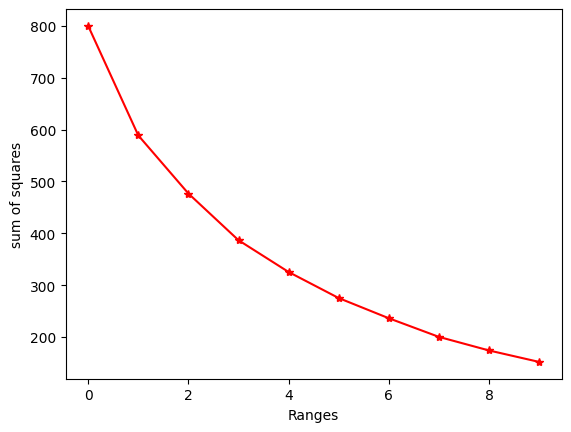

In [141]:
plt.plot(wcss,marker='*',color='red')
plt.xlabel('Ranges')
plt.ylabel('sum of squares')
plt.show(s)

In [142]:
# from this plot it was difficult to find the subsequent optimal value for the sum of squared error

# Segmentation on the basis of Age and Income

In [153]:
df1 = df[['Age','Annual Income (k$)']]

In [154]:
std = StandardScaler()
df1 = std.fit_transform(df1)

In [155]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(df1)
    wcss.append(km.inertia_)

In [156]:
wcss

[400.00000000000006,
 250.58811570754693,
 132.8553042122192,
 103.05151849277249,
 81.40819144310571,
 67.36900484698116,
 54.24732132834874,
 48.20764162878147,
 41.804819796305324,
 36.84718453529787]

<function matplotlib.pyplot.show(close=None, block=None)>

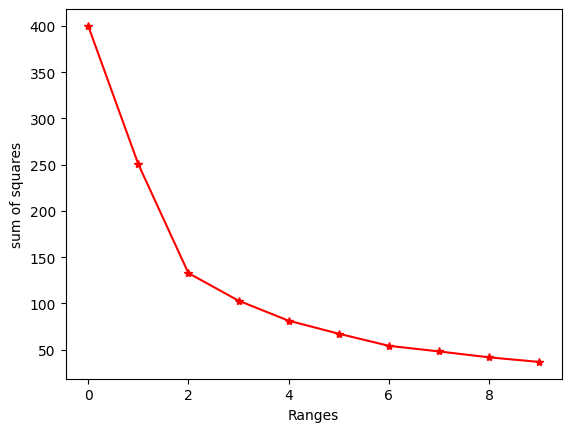

In [157]:
plt.plot(wcss,marker='*',color='red')
plt.xlabel('Ranges')
plt.ylabel('sum of squares')
plt.show

In [158]:
km = KMeans(n_clusters=2,random_state=0)

y1 = km.fit_predict(df1)

print(y1)

[0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [159]:
df1 = pd.DataFrame(df1)

df1[2]=y1

df1.head()
df1.columns = [0,1,2]

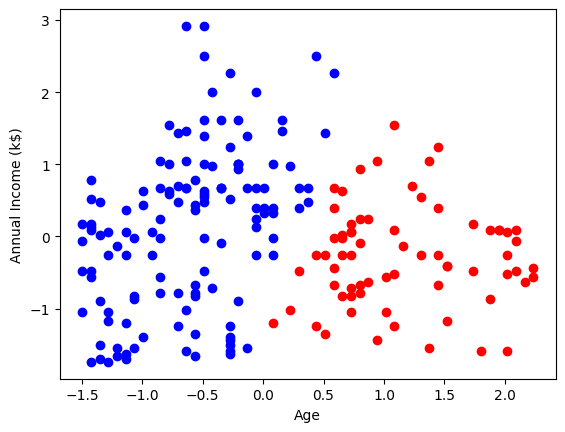

In [160]:
df11 = df1[df1[2]==0]
df12 = df1[df1[2]==1]


plt.scatter(df11[0],df11[1],c='blue')
plt.scatter(df12[0],df12[1],c='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Segmentation on the basis of Age and Spending Score

In [114]:
df2 = df[['Age','Spending Score (1-100)']]

In [115]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(df2)
    wcss.append(km.inertia_)

In [116]:
wcss

[171535.50000000003,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23811.52352472089,
 19502.4078393622,
 15598.876804915515,
 13082.951489621493,
 11584.6756523569,
 10282.71312366981]

<function matplotlib.pyplot.show(close=None, block=None)>

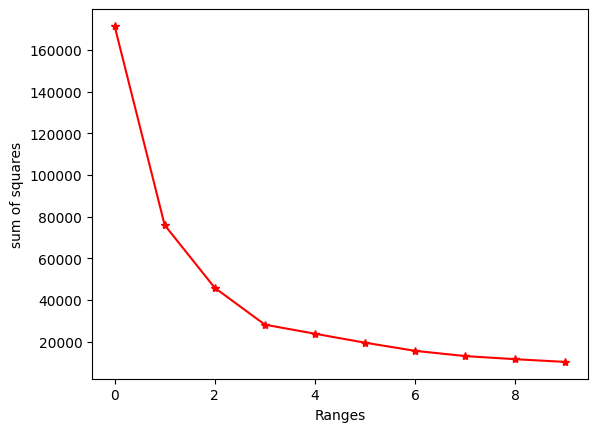

In [117]:
plt.plot(wcss,marker='*',color='red')
plt.xlabel('Ranges')
plt.ylabel('sum of squares')
plt.show

In [118]:
km = KMeans(n_clusters=3,random_state=0)

y2 = km.fit_predict(df2)

print(y2)

[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 1 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [120]:
df2 = pd.DataFrame(df2)

df2[2]=y2

df2.columns=[0,1,2]    #0 age    #annual income
df2.head()

,0,1,2
0,19,39,1
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,1


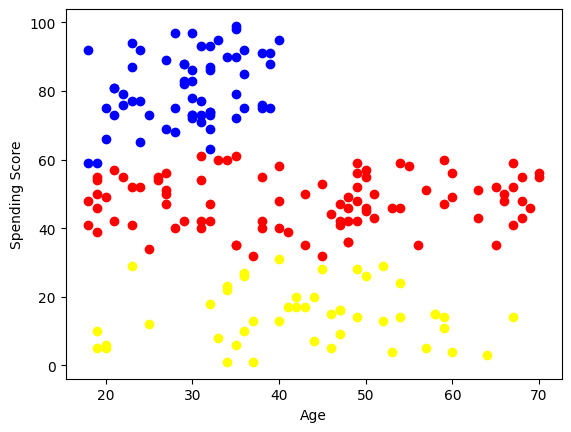

In [121]:
df21 = df2[df2[2]==0]
df22 = df2[df2[2]==1]
df23 = df2[df2[2]==2]


plt.scatter(df21[0],df21[1],c='blue')
plt.scatter(df22[0],df22[1],c='red')
plt.scatter(df23[0],df23[1],c='yellow')

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# Segmentation on the basis on Annual income and Spending Score

In [122]:
df3 = df[['Annual Income (k$)','Spending Score (1-100)']]

In [123]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(df3)
    wcss.append(km.inertia_)

In [124]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924128]

<function matplotlib.pyplot.show(close=None, block=None)>

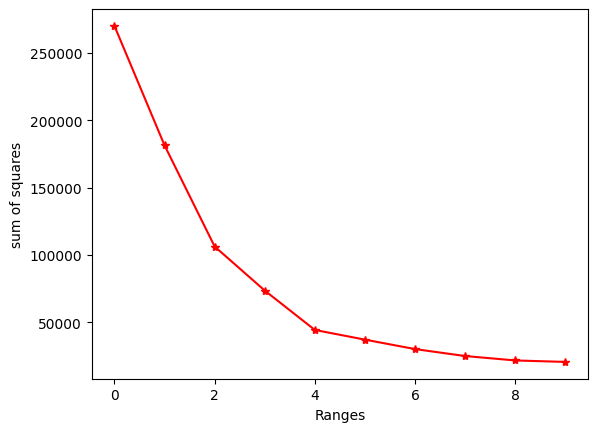

In [125]:
plt.plot(wcss,marker='*',color='red')
plt.xlabel('Ranges')
plt.ylabel('sum of squares')
plt.show

In [126]:
km = KMeans(n_clusters=4,random_state=0)

y3 = km.fit_predict(df3)

print(y3)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [127]:
df3 = pd.DataFrame(df3)

df3[2]=y3

df3.head()

,Annual Income (k$),Spending Score (1-100),2
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3


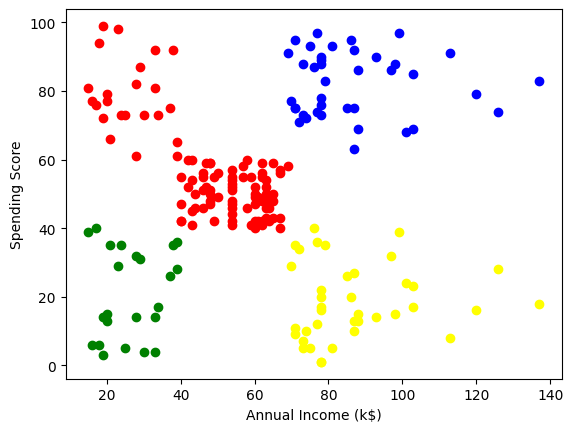

In [128]:
df31 = df3[df3[2]==0]
df32 = df3[df3[2]==1]
df33 = df3[df3[2]==2]
df34 = df3[df3[2]==3]


plt.scatter(df31['Annual Income (k$)'],df31['Spending Score (1-100)'],c='blue')
plt.scatter(df32['Annual Income (k$)'],df32['Spending Score (1-100)'],c='red')
plt.scatter(df33['Annual Income (k$)'],df33['Spending Score (1-100)'],c='yellow')
plt.scatter(df34['Annual Income (k$)'],df34['Spending Score (1-100)'],c='green')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()